In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree

In [22]:
!wget https://raw.githubusercontent.com/Archanajs2001/Prediction-using-Decision-Tree-Algorithm/main/Iris.csv

--2024-04-21 07:55:58--  https://raw.githubusercontent.com/Archanajs2001/Prediction-using-Decision-Tree-Algorithm/main/Iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [text/plain]
Saving to: ‘Iris.csv.1’

Iris.csv.1          100%[===================>]   4.99K  --.-KB/s    in 0s      

2024-04-21 07:55:58 (35.6 MB/s) - ‘Iris.csv.1’ saved [5107/5107]



In [23]:
#loading the dataset
data = pd.read_csv('Iris.csv')

In [24]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# selecting feature and target variables
X = data.drop(['Species','Id'], axis=1)
y = data.Species

In [26]:
# changing categorical target variable into numerical
y = LabelEncoder().fit_transform(y)

In [27]:
# splitting data set for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [30]:
# creating the model

model = DecisionTreeRegressor(random_state = 0)

# feeding the training data to the model

model.fit(X_train, y_train)

# predicting the test set results

dt_y_pred = model.predict(X_test)

# calculating the mean squared error
dt_MAE = metrics.mean_absolute_error(y_test, dt_y_pred)

# Calculating the root mean squared error
dt_RMSE = np.sqrt(metrics.mean_squared_error(y_test, dt_y_pred))

# Calculating the r2 score
dt_r2score = metrics.r2_score(y_test, dt_y_pred)

print('Mean Absolute Error:', dt_MAE)
print('Root Mean Square Error:', dt_RMSE)
print('R2 score:', dt_r2score)

Mean Absolute Error: 0.0
Root Mean Square Error: 0.0
R2 score: 1.0


Visualization of Decision Tree

In [31]:
!pip install graphviz

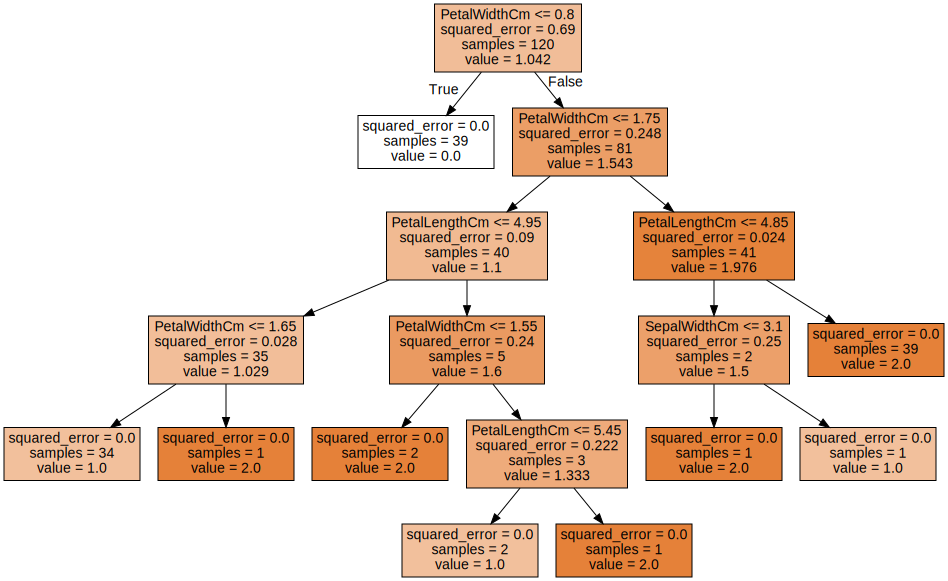

In [32]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X.columns.to_list(),
                                class_names='Series',
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph